<a href="https://colab.research.google.com/github/Keerthibalraj/Exploratory-Data-Analysis/blob/main/Case_Study_on_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [5]:
dummy_df = pd.read_csv('/content/drive/MyDrive/Exploratory Data Analytics/Copy of dummy_data.csv')
dummy_df

,Sno,Name,Age,Height(cm)
0,1,John,25.0,160.0
1,2,Jimmy,26.0,163.0
2,3,Felicia,28.0,154.0
3,4,Sophia,NaN,143.0
4,5,Bob,NaN,NaN
5,6,Billy,30.0,156.0
6,7,Kate,31.0,160.0
7,8,Will,29.0,NaN
8,9,Scott,NaN,148.0


In [6]:
dummy_df.describe()

,Sno,Age,Height(cm)
count,9.000000,6.000000,7.000000
mean,5.000000,28.166667,154.857143
std,2.738613,2.316607,7.174691
min,1.000000,25.000000,143.000000
25%,3.000000,26.500000,151.000000
50%,5.000000,28.500000,156.000000
75%,7.000000,29.750000,160.000000
max,9.000000,31.000000,163.000000


In [7]:
len(dummy_df)

9

In [8]:
dummy_df.isna()

,Sno,Name,Age,Height(cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,False,False,True,True
5,False,False,False,False
6,False,False,False,False
7,False,False,False,True
8,False,False,True,False


In [9]:
dummy_df.notna()

,Sno,Name,Age,Height(cm)
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,False,True
4,True,True,False,False
5,True,True,True,True
6,True,True,True,True
7,True,True,True,False
8,True,True,False,True


In [10]:
dummy_df.isnull()

,Sno,Name,Age,Height(cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,False,False,True,True
5,False,False,False,False
6,False,False,False,False
7,False,False,False,True
8,False,False,True,False


In [11]:
dummy_df.isnull().sum()

Sno           0
Name          0
Age           3
Height(cm)    2
dtype: int64

In [15]:
dummy_majority_df = pd.read_csv('/content/drive/MyDrive/Exploratory Data Analytics/Copy of dummy_missing_majority.csv', index_col=0)

In [16]:
#thresh=x attribute tells df.dropna() to keep rows with atleast 'x' Non-Null values
dummy_majority_df.dropna(thresh=4)

,Name,Age,Height(cm),Marks(100),Country,City
Sno,,,,,,
1,John,25.0,160.0,80.0,USA,New York
2,Jimmy,26.0,163.0,NaN,UK,London
3,Felicia,28.0,154.0,NaN,USA,Miami
6,Billy,30.0,156.0,NaN,France,Paris
7,Kate,31.0,160.0,NaN,Italy,Rome
8,Will,29.0,NaN,NaN,Russia,Moscow


In [17]:
dummy_majority_df.dropna(thresh=6)

,Name,Age,Height(cm),Marks(100),Country,City
Sno,,,,,,
1,John,25.0,160.0,80.0,USA,New York


In [18]:
#Dropping columns by percentage of missing values
dummy_majority_df.dropna(axis=1, thresh=int(0.4*len(dummy_majority_df)))

,Name,Age,Height(cm),Country,City
Sno,,,,,
1,John,25.0,160.0,USA,New York
2,Jimmy,26.0,163.0,UK,London
3,Felicia,28.0,154.0,USA,Miami
4,Sophia,NaN,143.0,NaN,NaN
5,Bob,NaN,NaN,NaN,NaN
6,Billy,30.0,156.0,France,Paris
7,Kate,31.0,160.0,Italy,Rome
8,Will,29.0,NaN,Russia,Moscow
9,Scott,NaN,148.0,NaN,NaN


In [19]:
dummy_majority_df.dropna(axis=0, thresh=int(0.6*len(dummy_majority_df.columns)))

,Name,Age,Height(cm),Marks(100),Country,City
Sno,,,,,,
1,John,25.0,160.0,80.0,USA,New York
2,Jimmy,26.0,163.0,NaN,UK,London
3,Felicia,28.0,154.0,NaN,USA,Miami
6,Billy,30.0,156.0,NaN,France,Paris
7,Kate,31.0,160.0,NaN,Italy,Rome
8,Will,29.0,NaN,NaN,Russia,Moscow


# **CASE STUDY**

In [21]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Exploratory Data Analytics/Copy of titanic-data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
cabin_df = titanic_df['Cabin']


In [26]:
percentage_missing_cabin = (cabin_df.isnull().sum()/(len(titanic_df) * 1.0)) * 100

In [27]:
percentage_missing_cabin

77.10437710437711

In [28]:
#Over 77% values in this column are missing. It's better to drop this column altogether

titanic_df.drop(columns=['Cabin'], inplace=True)
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [29]:
#Embarked Column

embarked_df = titanic_df['Embarked']

In [30]:
embarked_df.unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
embarked_df.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
titanic_df['Embarked'].fillna('S', inplace=True)

<Axes: >

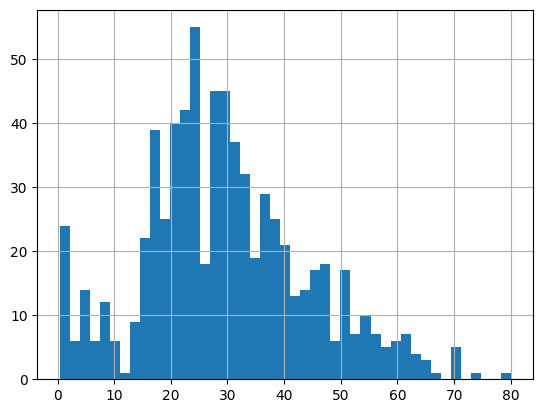

In [33]:
titanic_df['Age'].hist(bins=45)

In [34]:
age_df = titanic_df[['Age','Sex']]


In [35]:
age_df['Age'] = age_df.groupby('Sex').transform(lambda x: x.fillna(x.mean()))

<ipython-input-35-8d5862e6810d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['Age'] = age_df.groupby('Sex').transform(lambda x: x.fillna(x.mean()))


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

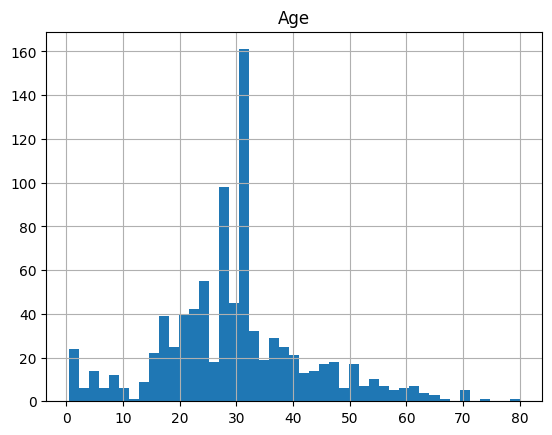

In [36]:
age_df.hist(bins=45)

<ipython-input-37-367566716ad7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['Age'] = age_df.groupby('Sex').transform(lambda x: x.fillna(x.median()))


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

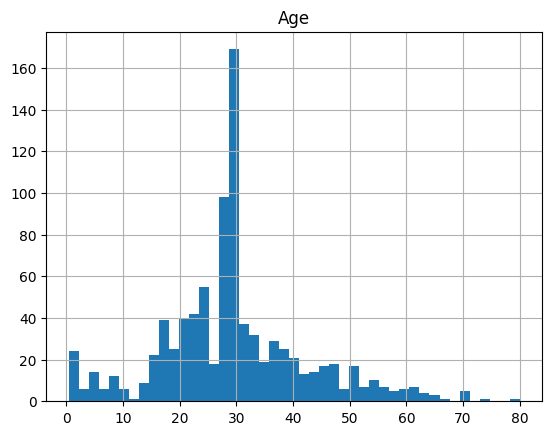

In [37]:
age_df = titanic_df[['Age','Sex']]
age_df['Age'] = age_df.groupby('Sex').transform(lambda x: x.fillna(x.median()))
age_df.hist(bins=45)